# The Normal Distribution Myth
This is the accompanying code to The Normal Distribution Myth article available on SSRN: https://ssrn.com/abstract=5283255 

You can watch a video walkthrough of this example and its article here: https://youtu.be/rrwC2zC7_jA

For a high-level description of the results and perspectives, see this Substack article: https://antonvorobets.substack.com/p/normal-distribution-myth 

In [1]:
import numpy as np
import yfinance as yf
import fortitudo.tech as ft
import matplotlib.pyplot as plt
from scipy.stats import normaltest, shapiro, anderson

# Index data download

In [2]:
tickers = [
    'XLB', 'XLE', 'XLF', 'XLI', 'XLK',
    'XLP', 'XLU', 'XLV', 'XLY', '^GSPC']
data = yf.download(tickers, start='1998-12-22', end='2025-06-04')['Close']

names_dict = {
    'XLB': 'Materials', 'XLE': 'Energy', 'XLF': 'Financial', 'XLI': 'Industrial',
    'XLK': 'Technology', 'XLP': 'Consumer Staples', 'XLU': 'Utilities',
    'XLV': 'Health Care', 'XLY': 'Consumer Discretionary', '^GSPC': 'S&P 500'}
data = data.rename(columns=names_dict)

print(f'The number of daily observations is {len(data)}.')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  10 of 10 completed

The number of daily observations is 6652.


In [3]:
data

Ticker,Materials,Energy,Financial,Industrial,Technology,Consumer Staples,Utilities,Health Care,Consumer Discretionary,S&P 500
Date,,,,,,,,,,
1998-12-22,11.660132,11.841606,11.335839,14.626601,23.982897,14.372804,11.996542,17.089306,18.907131,1203.569946
1998-12-23,11.782592,12.088138,11.502984,14.881826,24.555855,14.720261,11.946264,17.473326,18.988335,1228.540039
1998-12-24,12.053755,12.024517,11.578967,15.078157,24.462311,14.694834,12.166215,17.580004,19.336325,1226.270020
1998-12-28,11.948791,11.960894,11.427016,15.156695,24.532473,14.610084,12.103374,17.323994,19.162334,1225.489990
1998-12-29,12.167470,12.080186,11.548581,15.372657,24.602633,14.932120,12.304464,17.708014,19.579914,1241.810059
...,...,...,...,...,...,...,...,...,...,...
2025-05-28,86.010002,81.650002,50.590000,142.600006,231.240005,81.779999,80.529999,131.479996,214.880005,5888.549805
2025-05-29,86.330002,82.260002,50.849998,142.729996,231.630005,82.110001,81.089996,132.360001,214.970001,5912.169922
2025-05-30,86.339996,81.529999,50.959999,142.820007,230.910004,82.830002,81.919998,132.639999,213.800003,5911.689941


In [4]:
print(f'{np.round(len(data) / 252, 2)} years of daily data.')
remainder_days = len(data) % 252
print(f'{remainder_days} days remaining.')

26.4 years of daily data.
100 days remaining.


# Log returns computation

In [5]:
horizons = [1, 21, 63, 252]
log_prices = np.log(data.values)
log_returns_daily = log_prices[horizons[0]:] - log_prices[:-horizons[0]]
log_returns_monthly = log_prices[horizons[1]:] - log_prices[:-horizons[1]]
log_returns_quarterly = log_prices[horizons[2]:] - log_prices[:-horizons[2]]
log_returns_yearly = log_prices[horizons[3]:] - log_prices[:-horizons[3]]

In [6]:
stats = ft.simulation_moments(100 * log_returns_daily)
stats.index = data.columns
stats

,Mean,Volatility,Skewness,Kurtosis
Ticker,,,,
Materials,0.030344,1.500359,-0.193979,9.483975
Energy,0.029382,1.826690,-0.630118,15.066172
Financial,0.022635,1.807850,-0.134710,17.509720
Industrial,0.034358,1.341978,-0.334193,10.851814
Technology,0.034407,1.640848,0.088359,9.884640
Consumer Staples,0.026328,0.964260,-0.239685,10.942803
Utilities,0.028973,1.222527,-0.051895,14.083450
Health Care,0.030854,1.130872,-0.216691,11.779079
Consumer Discretionary,0.036583,1.439790,-0.347540,9.531116


# Normality tests for daily data

In [7]:
res = normaltest(log_returns_daily)
res.pvalue

array([8.61488251e-203, 0.00000000e+000, 0.00000000e+000, 1.93623461e-245,
       8.72954351e-204, 5.97254730e-235, 2.03875612e-269, 1.54565750e-246,
       2.22125129e-222, 4.70279943e-282])

In [8]:
res1 = shapiro(log_returns_daily, axis=0)
res1.pvalue

/home/anton/miniconda3/envs/fortitudo.tech/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:657: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6651.
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


array([2.70726234e-45, 9.87263019e-52, 6.04496505e-62, 2.10649772e-49,
       1.07359180e-48, 3.60304195e-48, 1.21090335e-52, 6.72535835e-49,
       7.72865550e-47, 8.20517005e-54])

In [9]:
res2 = []
I = data.shape[1]
for i in range(I):
    res_anderson = anderson(log_returns_daily[:, i])
    res2.append((res_anderson.statistic, res_anderson.critical_values[2]))
res2

[(np.float64(64.08182778376249), np.float64(0.787)),
 (np.float64(71.91646026366743), np.float64(0.787)),
 (np.float64(185.83503833766554), np.float64(0.787)),
 (np.float64(86.59496899321493), np.float64(0.787)),
 (np.float64(103.10136559280454), np.float64(0.787)),
 (np.float64(71.37908610299837), np.float64(0.787)),
 (np.float64(81.80474005745964), np.float64(0.787)),
 (np.float64(72.32862081507665), np.float64(0.787)),
 (np.float64(81.18921435872107), np.float64(0.787)),
 (np.float64(118.82778544585017), np.float64(0.787))]

# Normality tests for montly, quarterly, and yearly non-overlapping returs

In [10]:
k2 = np.full((remainder_days, I, 3), np.nan)  # 3 horizons: monthly, quarterly, and yearly
shapiro_p = np.full((remainder_days, I, 3), np.nan)
anderson_statistic = np.full((remainder_days, I, 3), np.nan)

In [11]:
for test in range(remainder_days):
    k2[test, :, 0] = normaltest(log_returns_monthly[test:-(remainder_days-test):horizons[1]]).pvalue
    k2[test, :, 1] = normaltest(log_returns_quarterly[test:-(remainder_days-test):horizons[2]]).pvalue
    k2[test, :, 2] = normaltest(log_returns_yearly[test:-(remainder_days-test):horizons[3]]).pvalue
    shapiro_p[test, :, 0] = shapiro(log_returns_monthly[test:-(remainder_days-test):horizons[1]], axis=0).pvalue
    shapiro_p[test, :, 1] = shapiro(log_returns_quarterly[test:-(remainder_days-test):horizons[2]], axis=0).pvalue
    shapiro_p[test, :, 2] = shapiro(log_returns_yearly[test:-(remainder_days-test):horizons[3]], axis=0).pvalue
    for i in range(I):
        anderson_statistic[test, i, 0] = anderson(log_returns_monthly[test:-(remainder_days-test):horizons[1], i]).statistic
        anderson_statistic[test, i, 1] = anderson(log_returns_quarterly[test:-(remainder_days-test):horizons[2], i]).statistic
        anderson_statistic[test, i, 2] = anderson(log_returns_yearly[test:-(remainder_days-test):horizons[3], i]).statistic

anderson_5p_critical_value = anderson(log_returns_monthly[test:-(remainder_days-test):horizons[3], i]).critical_values[2]

# Yearly return tests illustration for specific index

Showing normality test results for S&P 500 over 252 trading days.


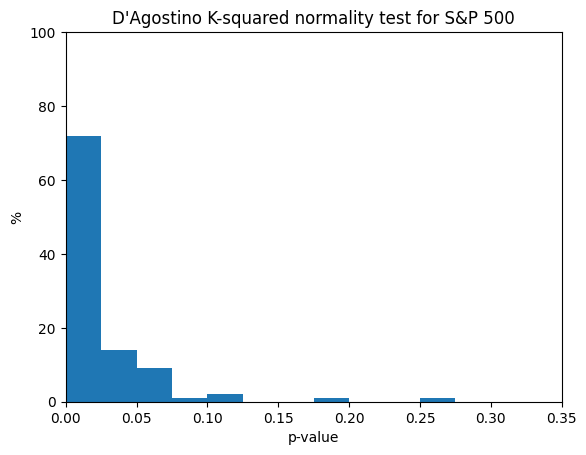

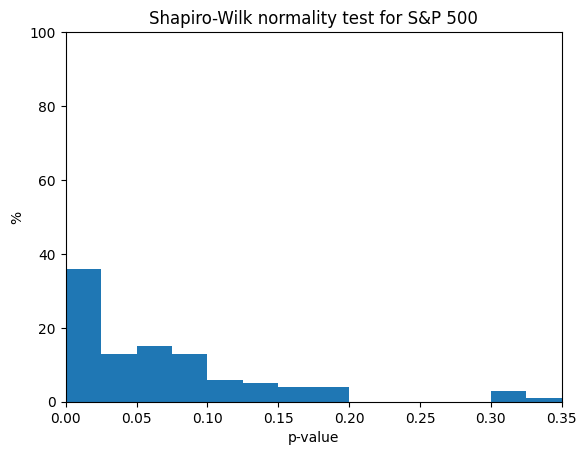

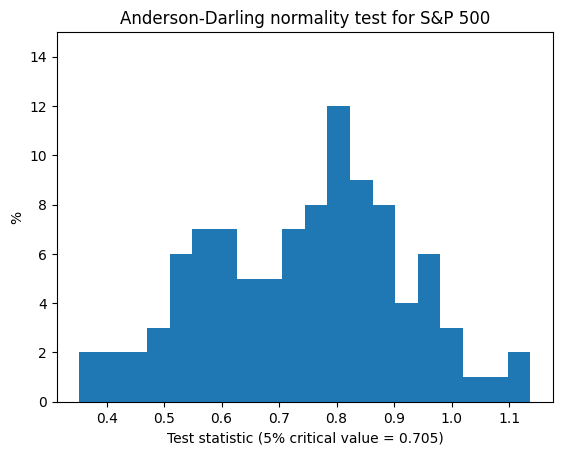

In [12]:
index = 9
horizon = 3
print(f'Showing normality test results for {data.columns[index]} over {horizons[horizon]} trading days.')

# Figure 1
plt.hist(k2[:, index, horizon-1], bins=14, range=(0, 0.35))
plt.ylim(0, 100)
plt.xlim(0, 0.35)
plt.title(f"D'Agostino K-squared normality test for {data.columns[index]}")
plt.xlabel('p-value')
plt.ylabel('%')
plt.show()

# Figure 2
plt.hist(shapiro_p[:, index, horizon-1], bins=14, range=(0, 0.35))
plt.ylim(0, 100)
plt.xlim(0, 0.35)
plt.title(f'Shapiro-Wilk normality test for {data.columns[index]}')
plt.xlabel('p-value')
plt.ylabel('%')
plt.show()

# Figure 3
plt.hist(anderson_statistic[:, index, horizon-1], bins=20)
plt.ylim(0, 15)
plt.title(f'Anderson-Darling normality test for {data.columns[index]}')
plt.xlabel(f'Test statistic (5% critical value = {anderson_5p_critical_value})')
plt.ylabel('%')
plt.show()